In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

D:\Installed_new\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [20]:
# def parser(x):
# 	return datetime.strptime('190'+x, '%Y-%m')

df = read_csv('HistoricalQuotes.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)#, date_parser=parser)
X = df['open']
X = X[1:]

In [21]:
df[:10]

,close,volume,open,high,low
date,,,,,
2019-08-10,200.99,"24,619,446",201.23,202.760,199.2900
2019-08-09,200.99,24619750.0000,201.30,202.760,199.2900
2019-08-08,203.43,27009520.0000,200.20,203.530,199.3900
2019-08-07,199.04,33364400.0000,195.41,199.560,193.8200
2019-08-06,197.00,35824790.0000,196.31,198.067,194.0400
2019-08-05,193.34,52392970.0000,197.99,198.649,192.5800
2019-08-02,204.02,40862120.0000,205.53,206.430,201.6300
2019-08-01,208.43,54017920.0000,213.90,218.030,206.7435
2019-07-31,213.04,69281360.0000,216.42,221.370,211.3000


In [22]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In [23]:
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=169.700123, expected=171.660000
predicted=171.371837, expected=165.000000
predicted=164.070300, expected=173.490000
predicted=173.803022, expected=171.760000
predicted=172.708790, expected=180.950000
predicted=180.035731, expected=184.460000
predicted=184.771185, expected=180.290000
predicted=179.628724, expected=182.660000
predicted=180.997321, expected=176.730000
predicted=177.778882, expected=171.510000
predicted=171.011937, expected=174.240000
predicted=174.000130, expected=174.940000
predicted=176.584401, expected=179.730000
predicted=179.745226, expected=178.370000
predicted=177.500753, expected=190.000000
predicted=189.894341, expected=190.500000
predicted=191.251123, expected=188.390000
predicted=187.212768, expected=193.900000
predicted=192.356226, expected=191.630000
predicted=192.932039, expected=199.000000
predicted=198.881499, expected=205.550000
predicted=205.860607, expected=209.980000
predicted=211.346597, expected=205.970000
predicted=204.346447, expected=201

In [24]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 17.292


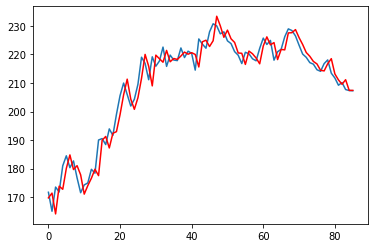

In [28]:
# plot
pyplot.plot(test.values)
pyplot.plot(predictions, color='red')
# pyplot.show()